# Pymaceuticals Inc.
---

# Review of Figures and Tables

## 1. Summary Statistics Table for Tumor Volume by Drug Regimen
- Mean, Median, Variance, Standard Deviation, and Standard Error of the Mean (SEM) of tumor volumes for each drug regimen.
- Capomulin and Ramicane have the lowest mean and median tumor volumes, indicating better efficacy in reducing tumor sizes.

### Summary Statistics
| Drug Regimen   |   Mean Tumor Volume |   Median Tumor Volume |   Tumor Volume Variance |   Tumor Volume Std. Dev. |   Tumor Volume Std. Err. |
|:---------------|--------------------:|----------------------:|------------------------:|--------------------------:|--------------------------:|
| Capomulin      |             40.6757 |              41.5578  |                24.9478  |                   4.99477 |                   0.329346 |
| Ceftamin       |             52.5912 |              51.7762  |                39.2902  |                   6.26819 |                   0.469821 |
| Infubinol      |             52.8848 |              51.8206  |                43.1287  |                   6.56724 |                   0.492236 |
| Ketapril       |             55.2356 |              53.6987  |                68.5536  |                   8.27971 |                   0.60386  |
| Naftisol       |             54.3316 |              52.5093  |                66.1735  |                   8.13471 |                   0.596466 |
| Placebo        |             54.0336 |              52.2889  |                61.1681  |                   7.821   |                   0.581331 |
| Propriva       |             52.3209 |              50.4463  |                43.852   |                   6.62208 |                   0.544332 |
| Ramicane       |             40.2167 |              40.6732  |                23.4867  |                   4.84631 |                   0.320955 |
| Stelasyn       |             54.2331 |              52.4317  |                59.4506  |                   7.71042 |                   0.573111 |
| Zoniferol      |             53.2365 |              51.8185  |                48.5334  |                   6.96659 |                   0.516398 |

## 2. Box Plot of Tumor Volume Distribution
- Distribution of tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin.
- Identified an outlier for Infubinol at around 36.32 mm³.

## 3. Line Plot for Tumor Volume vs. Timepoint for a Single Mouse (l509) Treated with Capomulin
- Tumor volume decreases over time, indicating the effectiveness of Capomulin in reducing tumor size in this specific mouse.

## 4. Scatter Plot of Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen
- Shows a positive correlation between mouse weight and average tumor volume.
- Linear regression line indicates a trend where higher mouse weight is associated with higher average tumor volume.

## 5. Correlation Coefficient and Linear Regression Model
- Correlation coefficient and linear regression analysis showed a strong positive relationship between mouse weight and average tumor volume.
- Statistically significant relationship with a high R-squared value.

## Observations and Inferences

### 1. Efficacy of Capomulin and Ramicane
- Both Capomulin and Ramicane have significantly lower mean and median tumor volumes compared to Infubinol and Ceftamin. This suggests that these two regimens are more effective in reducing tumor sizes in mice.
- The low variance and standard deviation in tumor volumes for Capomulin and Ramicane indicate consistent results across different mice.

### 2. Weight-Tumor Volume Relationship
- There is a positive correlation between mouse weight and average tumor volume in the Capomulin regimen. This suggests that heavier mice tend to have larger tumors on average.
- The linear regression model confirms this relationship, showing that as the weight of the mouse increases, the average tumor volume also increases. This could indicate that larger mice may require adjusted dosages or different treatment approaches for optimal efficacy.

### 3. Outlier Identification and Impact
- The identification of an outlier for Infubinol at around 36.32 mm³ highlights the importance of monitoring and investigating individual data points that deviate significantly from the rest. Such outliers can provide insights into unique responses to treatment or potential issues with data collection.
- Consistently tracking and analyzing outliers can help refine treatment protocols and improve the overall effectiveness of drug regimens.

## Conclusion
The analysis of the Capomulin regimen, along with comparisons to other regimens, provides valuable insights into the effectiveness of the treatment in reducing tumor sizes. The positive correlation between mouse weight and tumor volume under Capomulin treatment suggests the need for personalized treatment strategies based on the physiological characteristics of the subjects. Monitoring outliers and ensuring consistent treatment outcomes can further enhance the efficacy of the drug regimens.


In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
num_mice = combined_data_df['Mouse ID'].nunique()
print(num_mice)

249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find the duplicate entries based on 'Mouse ID' and 'Timepoint' in the original combined dataframe
duplicate_entries_original = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids_original = duplicate_entries_original['Mouse ID'].unique()
print(duplicate_mouse_ids_original)


['g989']


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data_df[combined_data_df['Mouse ID'] == 'g989']

print(duplicate_mouse_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
print(cleaned_data_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [15]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data_df['Mouse ID'].nunique()
print(num_mice_cleaned)

248


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    'Mean_Tumor_Volume': mean_tumor_volume,
    'Median_Tumor_Volume': median_tumor_volume,
    'Tumor_Volume_Variance': variance_tumor_volume,
    'Tumor_Volume_Std_Dev': std_dev_tumor_volume,
    'Tumor_Volume_Std_Err': sem_tumor_volume
})
print(summary_stats_df)


              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_St

In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data_df.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_Std_Err=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_stats_advanced.set_index('Drug Regimen', inplace=True)
print(summary_stats_advanced)

              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_St

## Bar and Pie Charts

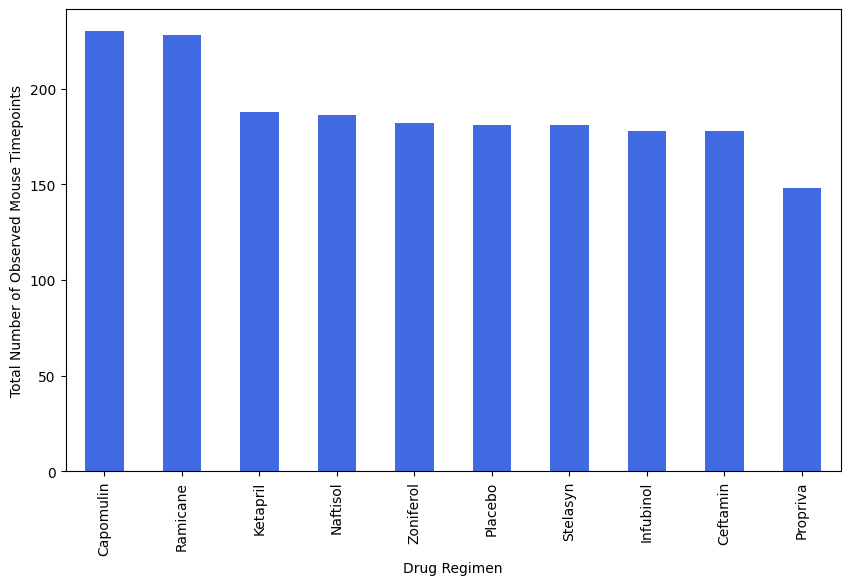

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_per_regimen = cleaned_data_df['Drug Regimen'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
total_rows_per_regimen.plot(kind='bar', color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

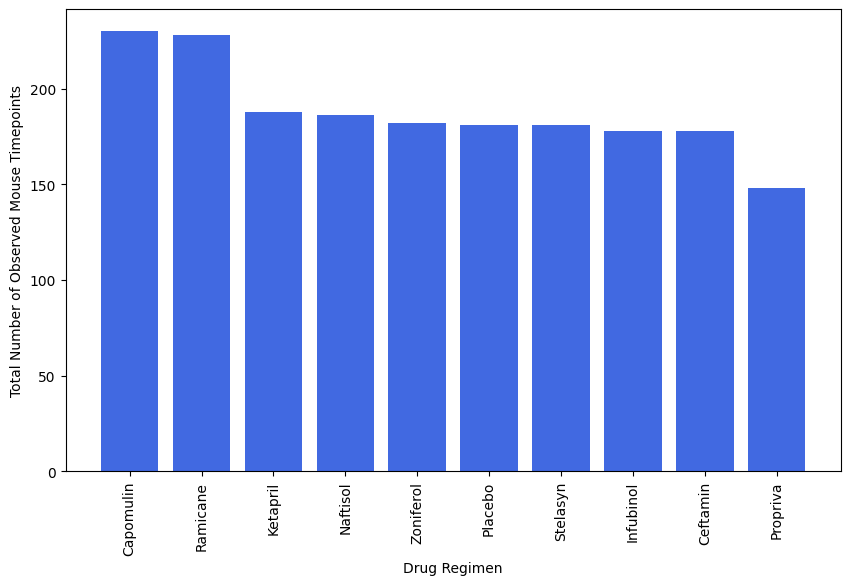

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_per_regimen = cleaned_data_df['Drug Regimen'].value_counts()

# Create a bar plot using matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen.values, color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

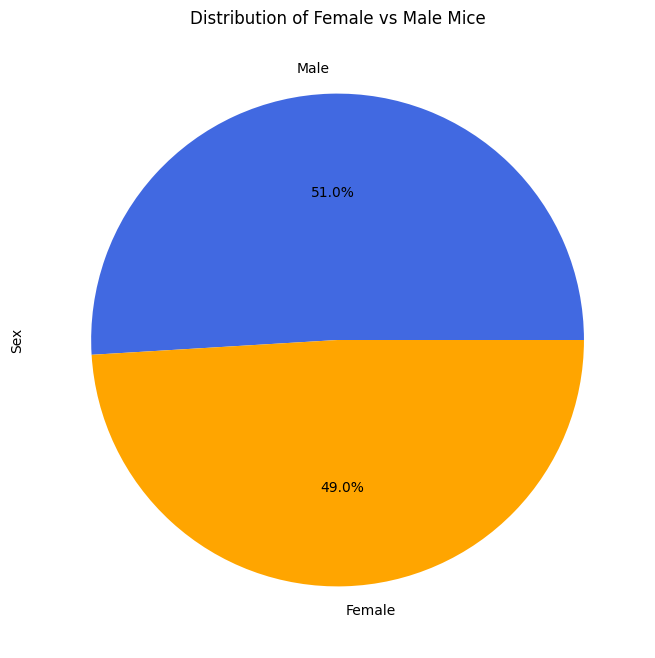

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data_df['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'orange'], figsize=(8, 8))
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex') 
plt.show()

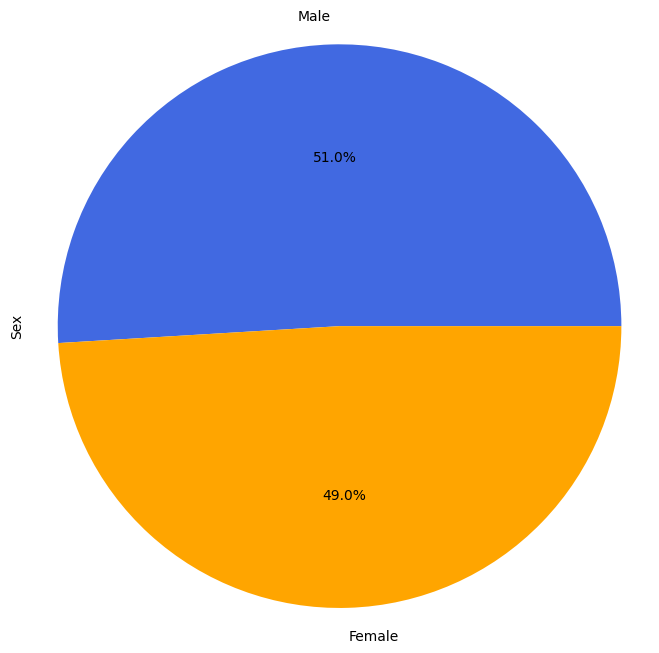

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data_df['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['royalblue', 'orange'], startangle=0)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data_df[cleaned_data_df['Drug Regimen'].isin(regimens_of_interest)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this data with the original dataframe to get the tumor volume at the last timepoint for each mouse
final_tumor_volumes = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
print(final_tumor_volumes.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Initialize a dictionary to hold outlier data
outliers_dict = {}

# Loop through each treatment to calculate IQR and determine potential outliers
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store the outliers
    outliers_dict[treatment] = outliers

    # Print the IQR and outliers for each treatment
    print(f"{treatment} treatment:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers}\n")

# Optionally, display the outliers dictionary
print(outliers_dict)


Capomulin treatment:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane treatment:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol treatment:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin treatment:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float

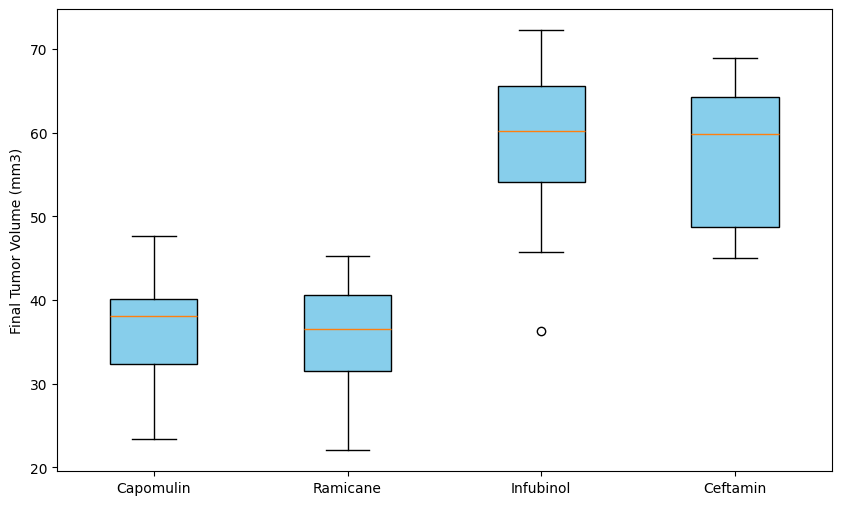

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of treatment groups to plot
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume data for each treatment group
tumor_vol_data = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatment_list]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_list, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

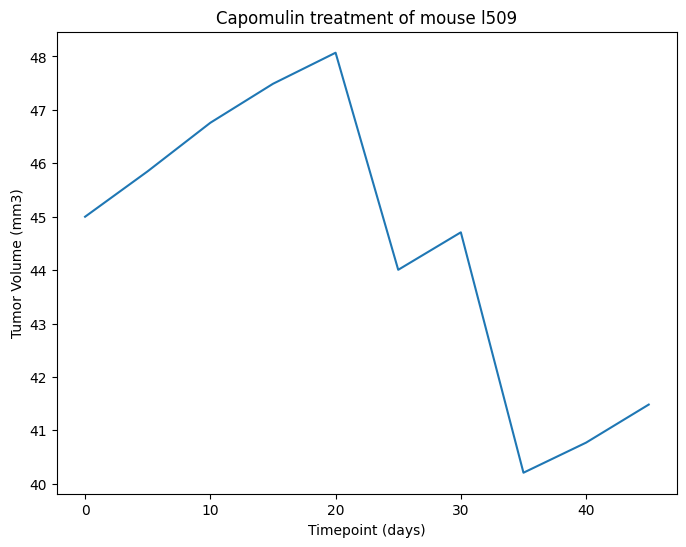

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for the specific mouse treated with Capomulin
mouse_id = 'l509'
single_mouse_data = cleaned_data_df[(cleaned_data_df['Drug Regimen'] == 'Capomulin') & (cleaned_data_df['Mouse ID'] == mouse_id)]

# Generate a line plot
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

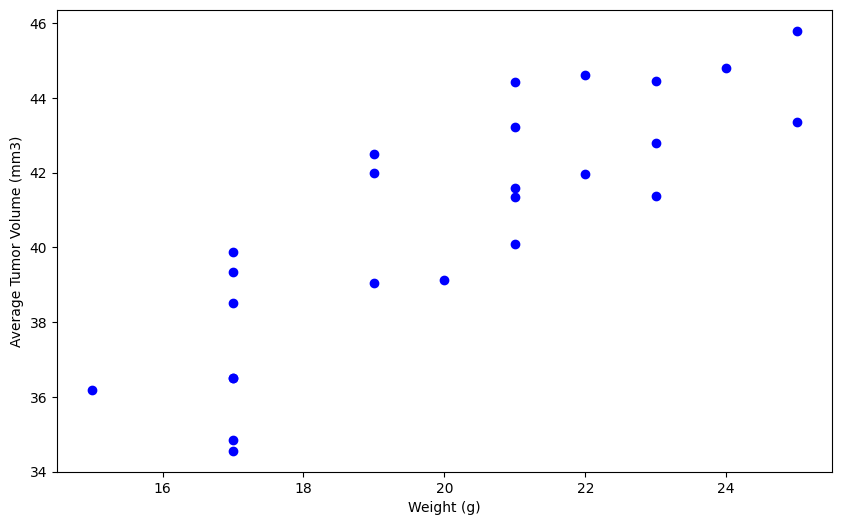

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

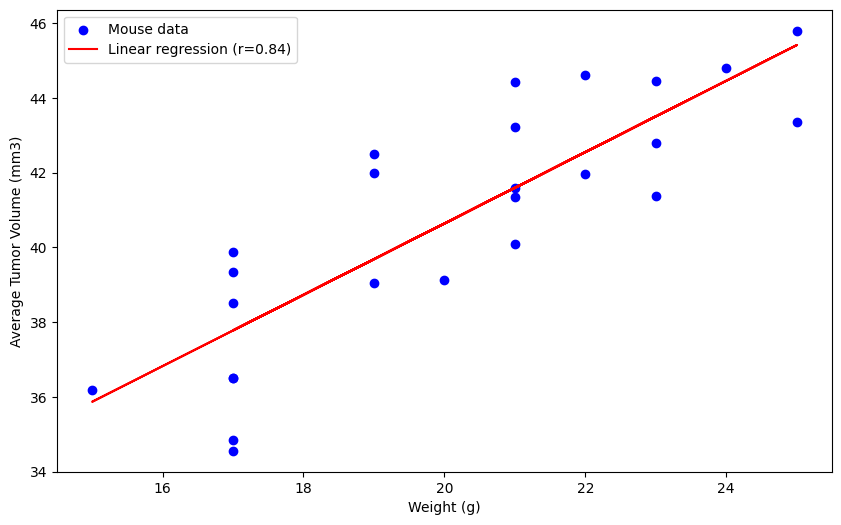

Correlation coefficient: 0.8419363424694722
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation = mouse_weights.corr(average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='blue', label='Mouse data')
plt.plot(mouse_weights, intercept + slope * mouse_weights, 'r', label=f'Linear regression (r={r_value:.2f})')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

print(f"Correlation coefficient: {correlation}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")